In [ ]:
library(rethinking)
data(Howell1)
d <- Howell1
d2 <- d[ d$age >= 18 , ]

Loading required package: cmdstanr



This is cmdstanr version 0.8.1

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/rehabnaeem/.cmdstan/cmdstan-2.36.0

- CmdStan version: 2.36.0

Loading required package: posterior

This is posterior version 1.6.0.9000


Attaching package: 'posterior'


The following objects are masked from 'package:stats':

    mad, sd, var


The following objects are masked from 'package:base':

    %in%, match


Loading required package: parallel

Warning message in (function (n) :
"strings not representable in native encoding will be translated to UTF-8"
Warning message in (function (n) :
"strings not representable in native encoding will be translated to UTF-8"
Warning message in (function (n) :
"strings not representable in native encoding will be translated to UTF-8"
rethinking (Version 2.42)


Attaching package: 'rethinking'


The following object is masked from 'package:stats':

    rstudent




In [1]:
dens(d2$height)

ERROR: Error in dens(d2$height): could not find function "dens"


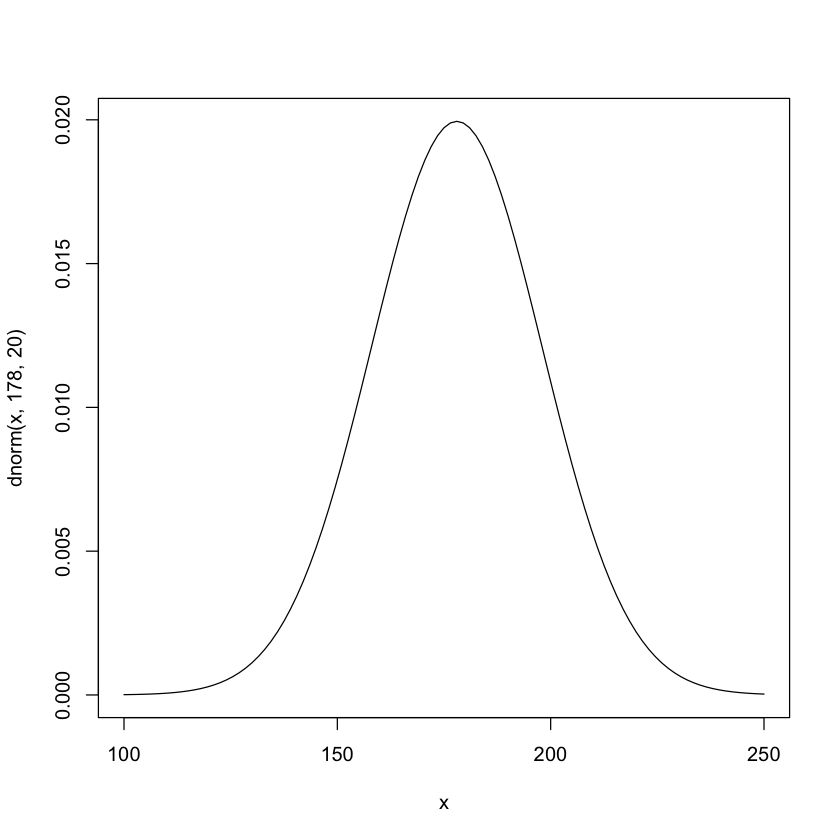

In [ ]:
curve( dnorm( x , 178 , 20 ) , from=100 , to=250 )

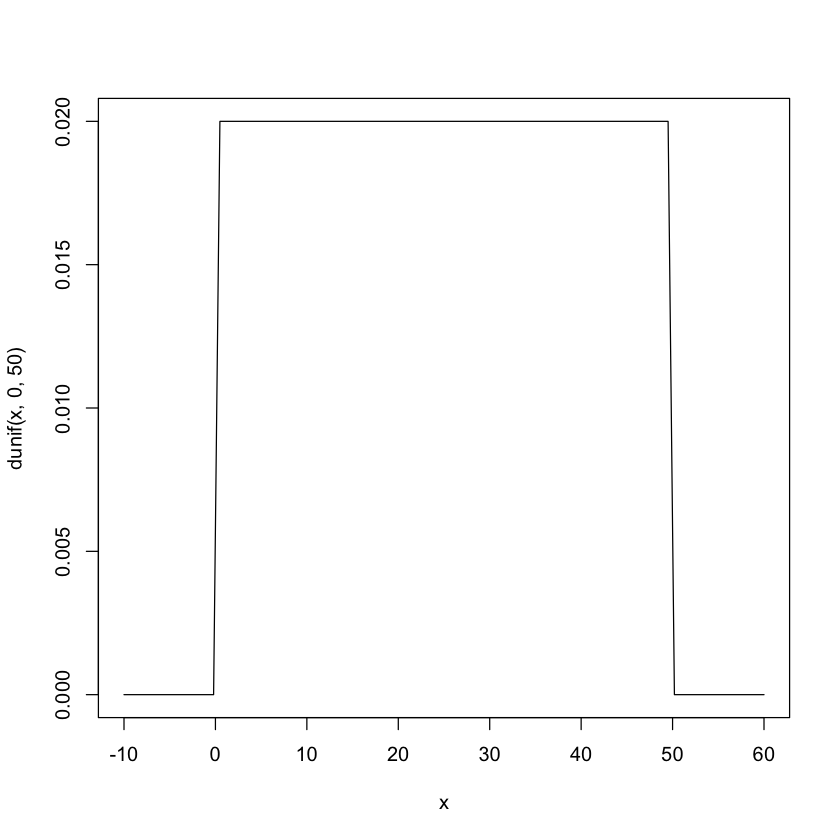

In [ ]:
curve( dunif( x , 0 , 50 ) , from=-10 , to=60 )

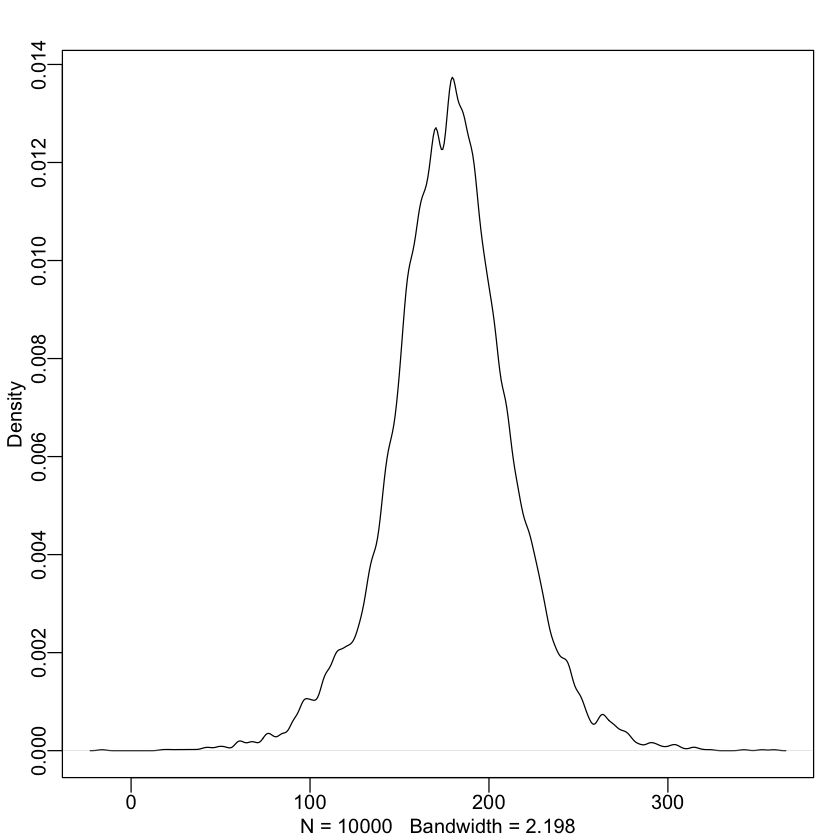

In [ ]:
sample_mu <- rnorm( 1e4 , 178 , 20 )
sample_sigma <- runif( 1e4 , 0 , 50 )
prior_h <- rnorm( 1e4 , sample_mu , sample_sigma )
dens( prior_h )

In [ ]:
mu.list <- seq( from=150, to=160 , length.out=100 )
sigma.list <- seq( from=7 , to=9 , length.out=100 )
post <- expand.grid( mu=mu.list , sigma=sigma.list )
post$LL <- sapply( 1:nrow(post) , function(i) sum(
dnorm( d2$height , post$mu[i] , post$sigma[i] , log=TRUE ) ) )
post$prod <- post$LL + dnorm( post$mu , 178 , 20 , TRUE ) +
dunif( post$sigma , 0 , 50 , TRUE )
post$prob <- exp( post$prod - max(post$prod) )

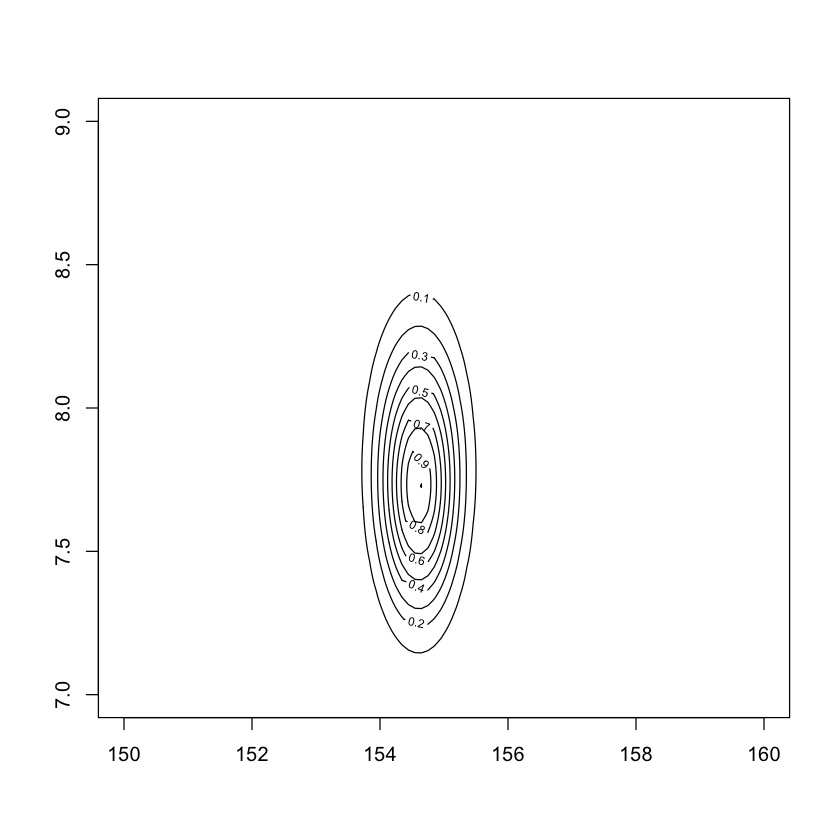

In [ ]:
contour_xyz( post$mu , post$sigma , post$prob )

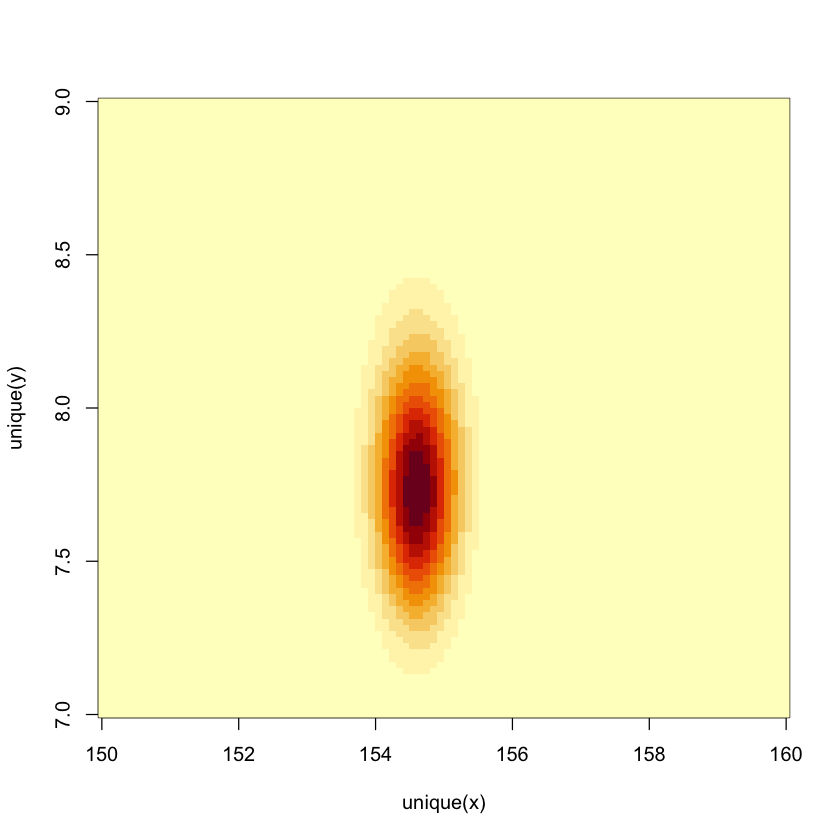

In [ ]:
image_xyz( post$mu , post$sigma , post$prob )

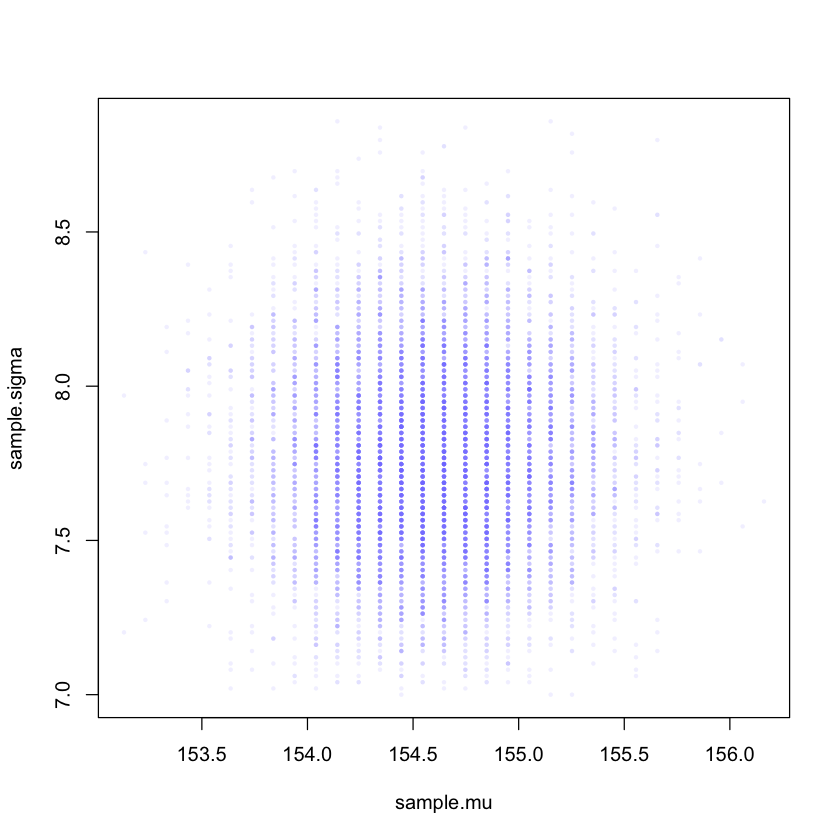

In [ ]:
sample.rows <- sample( 1:nrow(post) , size=1e4 , replace=TRUE ,
prob=post$prob )
sample.mu <- post$mu[ sample.rows ]
sample.sigma <- post$sigma[ sample.rows ]

plot( sample.mu , sample.sigma , cex=0.5 , pch=16 , col=col.alpha(rangi2,0.1) )

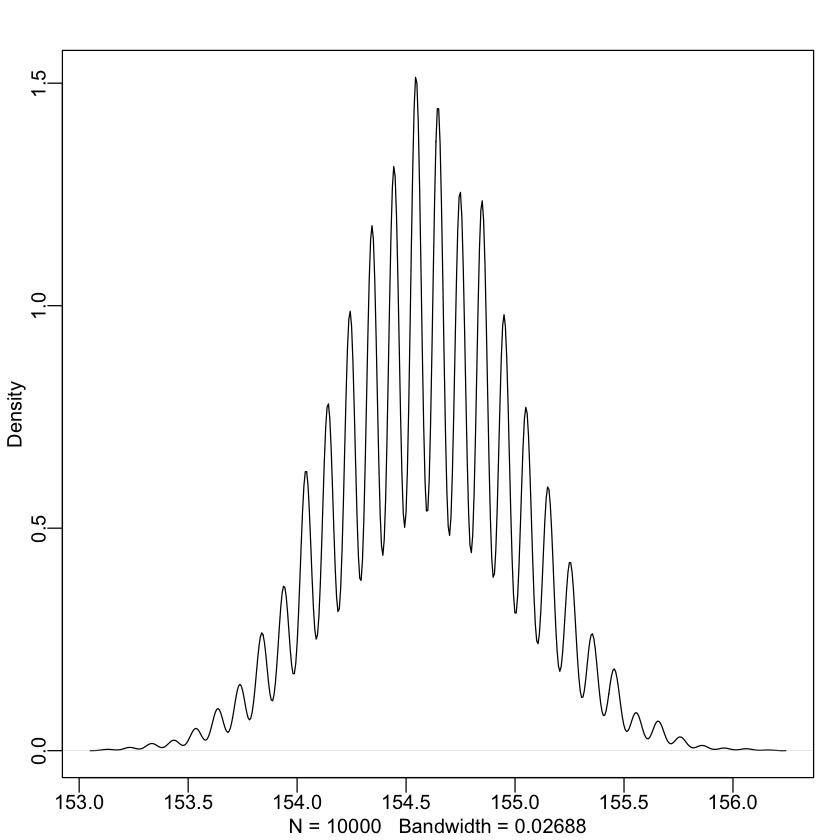

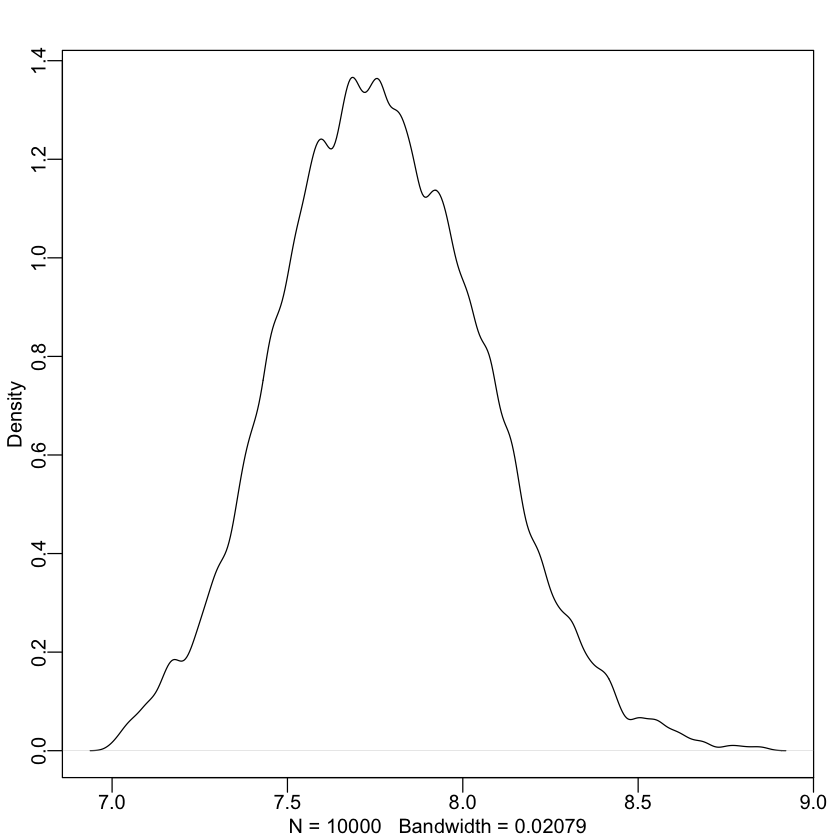

In [ ]:
dens( sample.mu )
dens( sample.sigma )

In [ ]:
PI( sample.mu )
PI( sample.sigma )

5%      94% 
153.9394 155.2525

5%      94% 
7.323232 8.252525

In [ ]:
d3 <- sample( d2$height , size=20 )

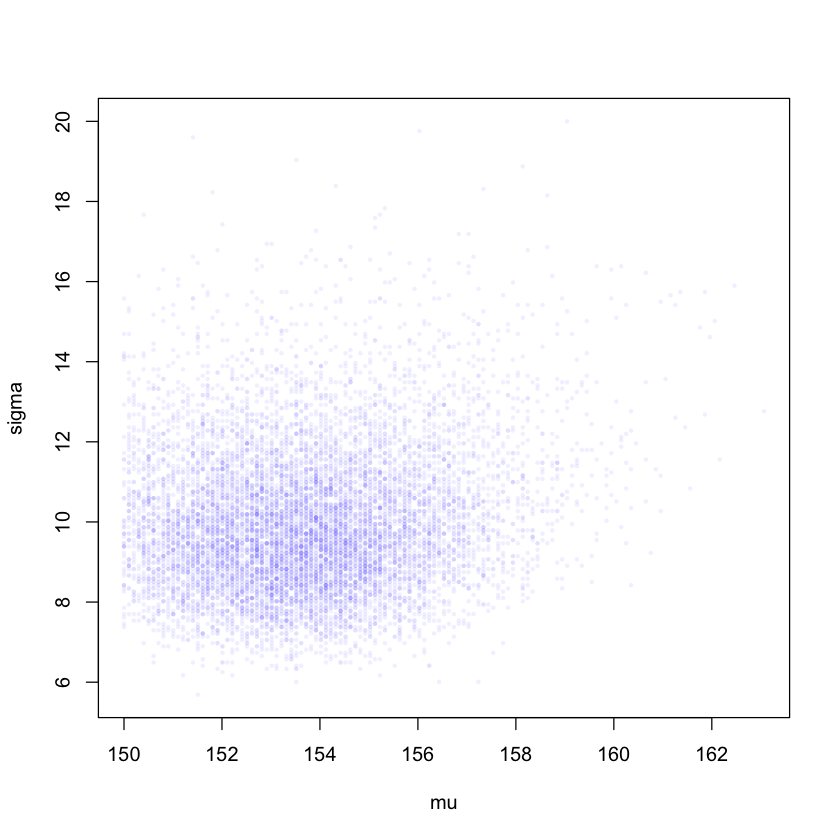

In [ ]:
mu.list <- seq( from=150, to=170 , length.out=200 )
sigma.list <- seq( from=4 , to=20 , length.out=200 )
post2 <- expand.grid( mu=mu.list , sigma=sigma.list )
post2$LL <- sapply( 1:nrow(post2) , function(i)
sum( dnorm( d3 , mean=post2$mu[i] , sd=post2$sigma[i] ,
log=TRUE ) ) )
post2$prod <- post2$LL + dnorm( post2$mu , 178 , 20 , TRUE ) +
dunif( post2$sigma , 0 , 50 , TRUE )
post2$prob <- exp( post2$prod - max(post2$prod) )
sample2.rows <- sample( 1:nrow(post2) , size=1e4 , replace=TRUE ,
prob=post2$prob )
sample2.mu <- post2$mu[ sample2.rows ]
sample2.sigma <- post2$sigma[ sample2.rows ]
plot( sample2.mu , sample2.sigma , cex=0.5 ,
col=col.alpha(rangi2,0.1) ,
xlab="mu" , ylab="sigma" , pch=16 )

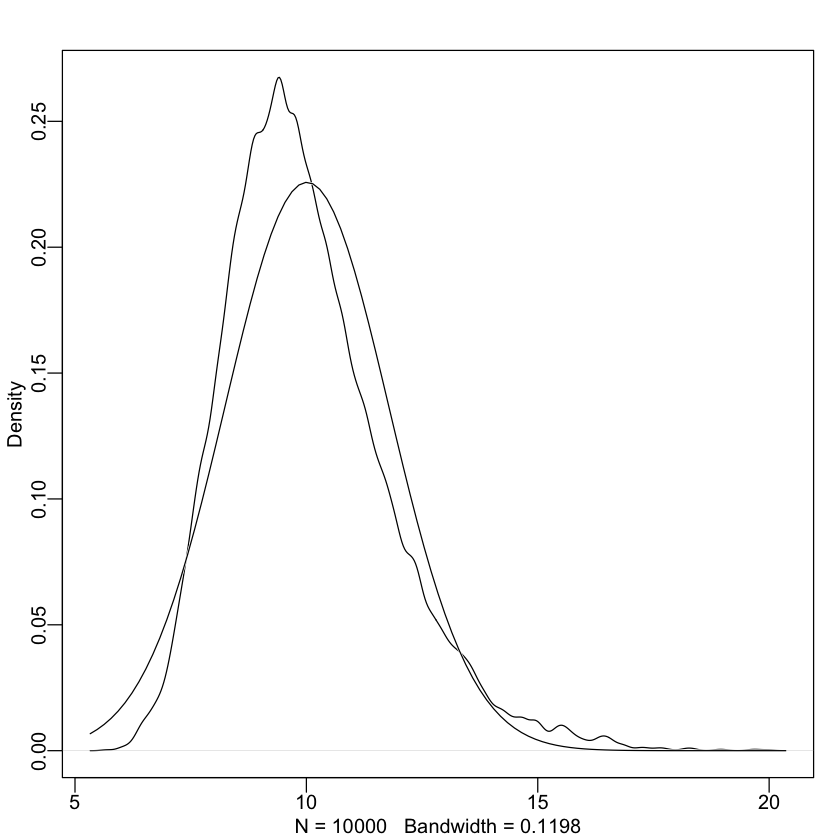

In [ ]:
dens( sample2.sigma , norm.comp=TRUE )

In [ ]:
flist <- alist(
height ~ dnorm( mu , sigma ) ,
mu ~ dnorm( 178 , 20 ) ,
sigma ~ dunif( 0 , 50 )
)

m4.1 <- quap( flist , data=d2 )

precis( m4.1 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,154.607627,0.4119762,153.949209,155.266045
sigma,7.730985,0.2913533,7.265346,8.196624


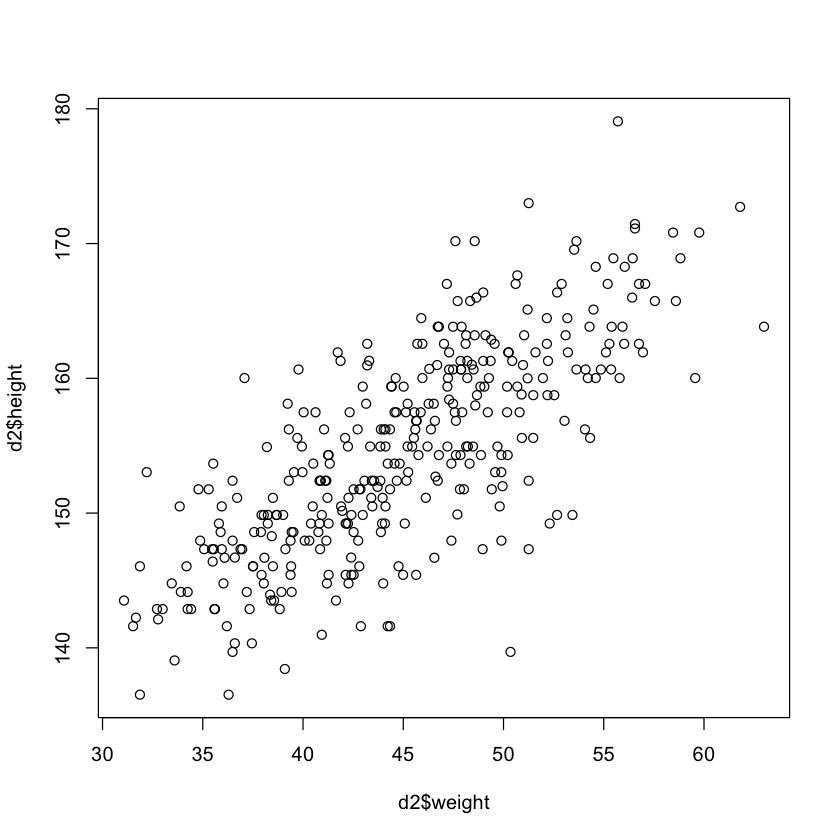

In [ ]:
plot( d2$height ~ d2$weight )

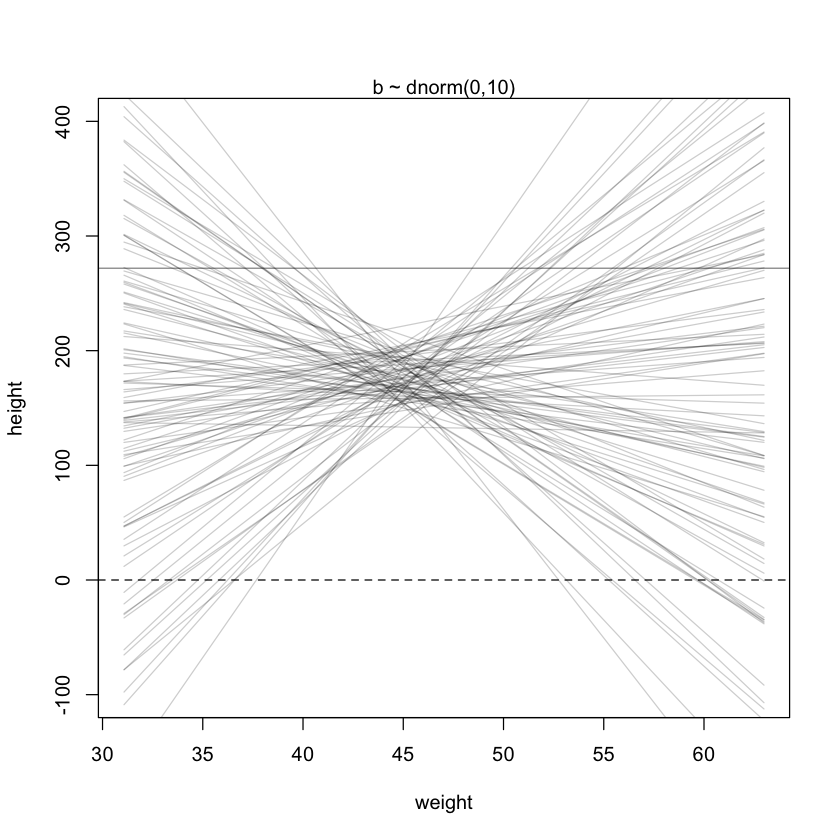

In [ ]:
set.seed(2971)
N <- 100 # 100 lines
a <- rnorm( N , 178 , 20 )
b <- rnorm( N , 0 , 10 )

plot( NULL , xlim=range(d2$weight) , ylim=c(-100,400) ,
xlab="weight" , ylab="height" )
abline( h=0 , lty=2 )
abline( h=272 , lty=1 , lwd=0.5 )
mtext( "b ~ dnorm(0,10)" )
xbar <- mean(d2$weight)
for ( i in 1:N ) curve( a[i] + b[i]*(x - xbar) ,
from=min(d2$weight) , to=max(d2$weight) , add=TRUE ,
col=col.alpha("black",0.2) )

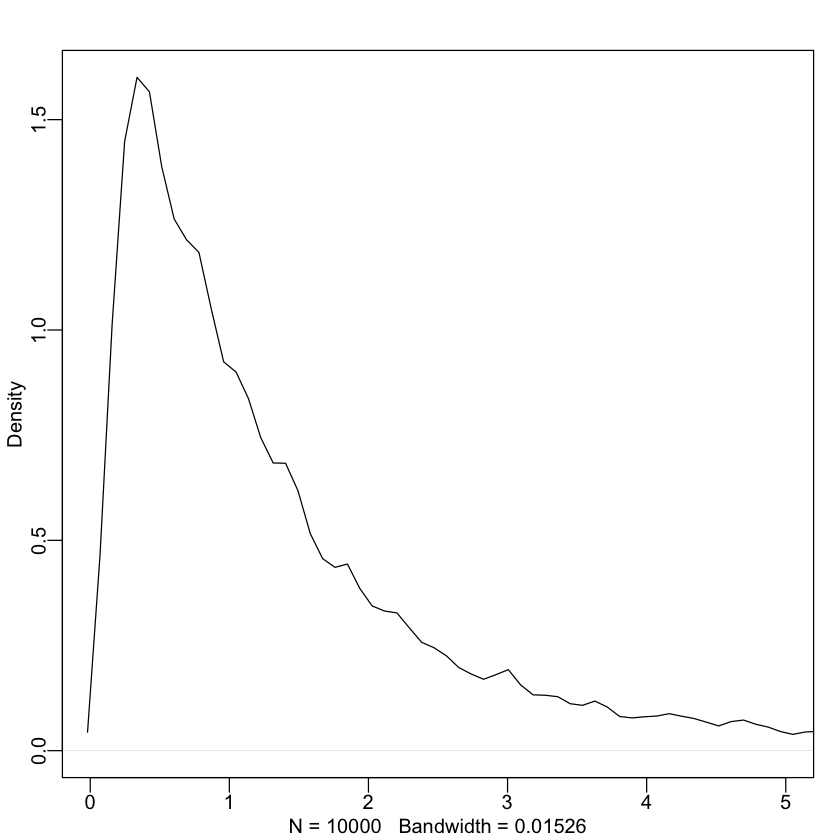

In [ ]:
b <- rlnorm( 1e4 , 0 , 1 )
dens( b , xlim=c(0,5) , adj=0.1 )

In [ ]:
# load data again, since it's a long way back
library(rethinking)
data(Howell1); d <- Howell1; d2 <- d[ d$age >= 18 , ]
# define the average weight, x-bar
xbar <- mean(d2$weight)
# fit model

m4.3 <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a + b*( weight - xbar ) ,
a ~ dnorm( 178 , 20 ) ,
b ~ dlnorm( 0 , 1 ) ,
sigma ~ dunif( 0 , 50 )
) , data=d2 )

precis( m4.3 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.6013684,0.27030758,154.1693646,155.0333721
b,0.9032808,0.04192362,0.8362788,0.9702829
sigma,5.0718794,0.19115464,4.7663774,5.3773815


In [ ]:
round( vcov( m4.3 ) , 3 )

,a,b,sigma
a,0.073,0.000,0.000
b,0.000,0.002,0.000
sigma,0.000,0.000,0.037


Warning message in par(usr):
"argument 1 does not name a graphical parameter"


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


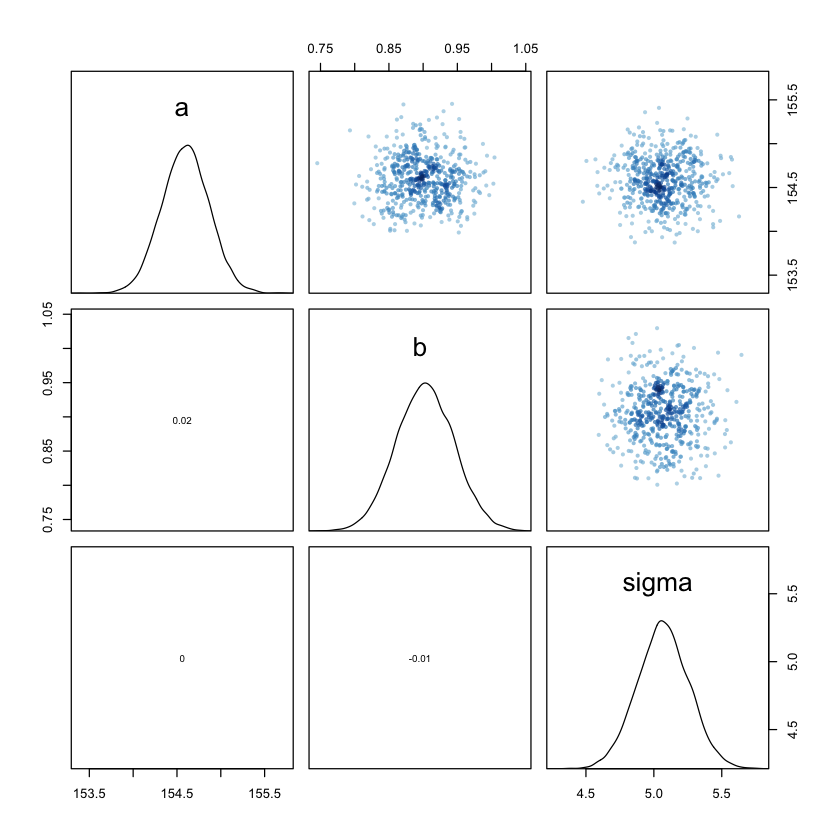

In [ ]:
pairs(m4.3)

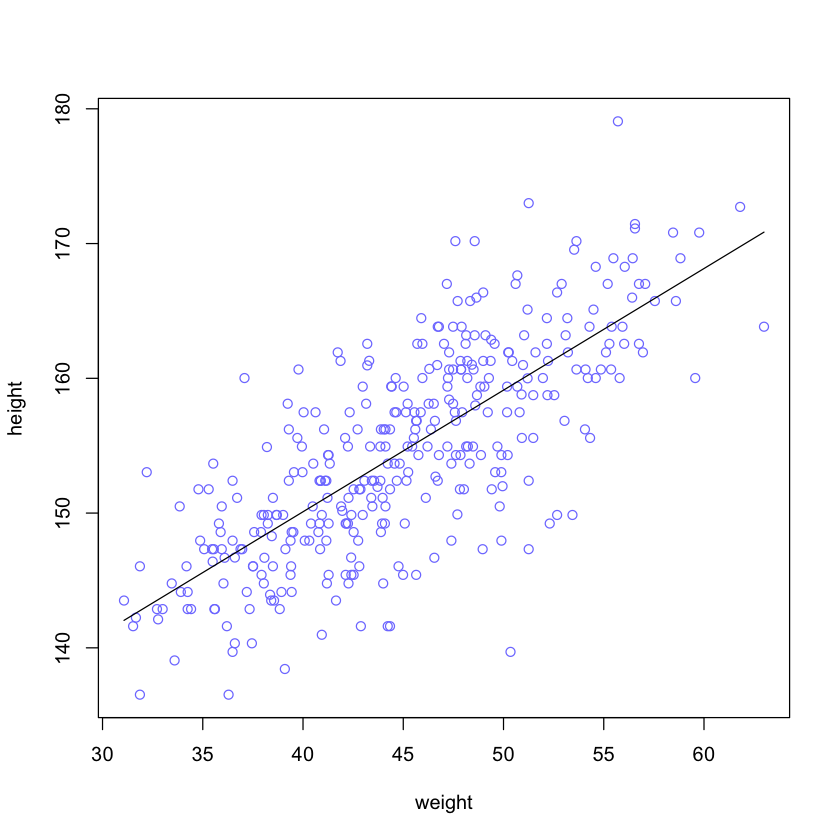

In [ ]:
plot( height ~ weight , data=d2 , col=rangi2 )
post <- extract.samples( m4.3 )
a_map <- mean(post$a)
b_map <- mean(post$b)
curve( a_map + b_map*(x - xbar) , add=TRUE )

In [ ]:
N <- 10
dN <- d2[ 1:N , ]
mN <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a + b*( weight - mean(weight) ) ,
a ~ dnorm( 178 , 20 ) ,
b ~ dlnorm( 0 , 1 ) ,
sigma ~ dunif( 0 , 50 )
) , data=dN )

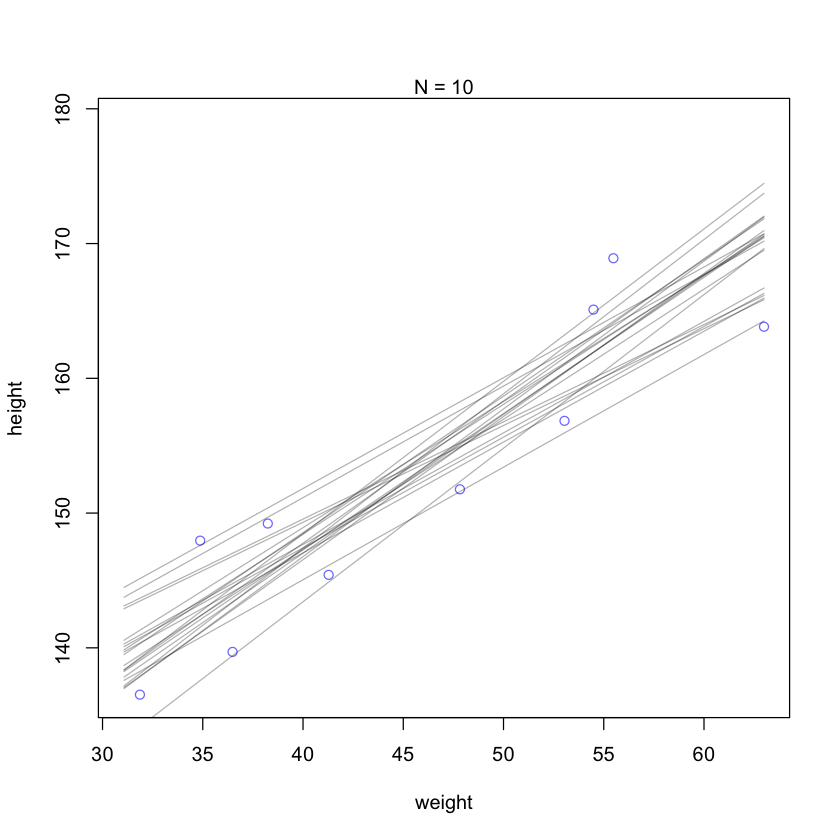

In [ ]:
# extract 20 samples from the posterior
post <- extract.samples( mN , n=20 )
# display raw data and sample size
plot( dN$weight , dN$height ,
xlim=range(d2$weight) , ylim=range(d2$height) ,
col=rangi2 , xlab="weight" , ylab="height" )
mtext(concat("N = ",N))
# plot the lines, with transparency
for ( i in 1:20 )
curve( post$a[i] + post$b[i]*(x-mean(dN$weight)) ,
col=col.alpha("black",0.3) , add=TRUE )

In [ ]:
post <- extract.samples( m4.3 )
mu_at_50 <- post$a + post$b * ( 50 - xbar )

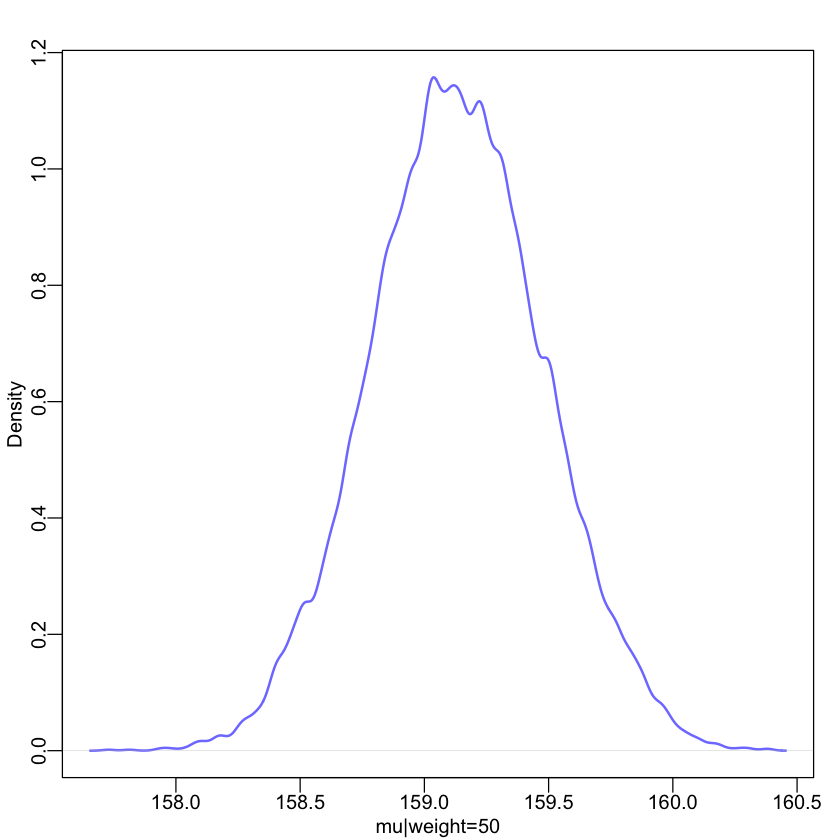

In [ ]:
dens( mu_at_50 , col=rangi2 , lwd=2 , xlab="mu|weight=50" )

In [ ]:
mu <- link( m4.3 )

In [ ]:
# define sequence of weights to compute predictions for
# these values will be on the horizontal axis
weight.seq <- seq( from=25 , to=70 , by=1 )
# use link to compute mu
# for each sample from posterior
# and for each weight in weight.seq
mu <- link( m4.3 , data=data.frame(weight=weight.seq) )
str(mu)

 num [1:1000, 1:46] 135 135 135 136 138 ...


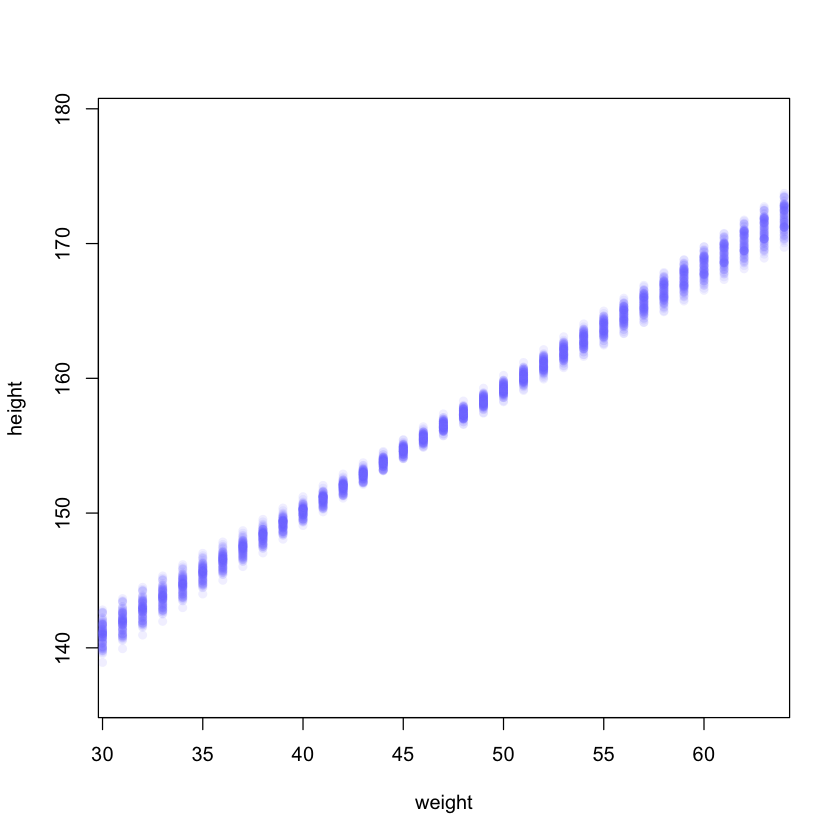

In [ ]:
# use type="n" to hide raw data
plot( height ~ weight , d2 , type="n" )
# loop over samples and plot each mu value
for ( i in 1:100 )
    points( weight.seq , mu[i,] , pch=16 , col=col.alpha(rangi2,0.1) )

In [ ]:
# summarize the distribution of mu
mu.mean <- apply( mu , 2 , mean )
mu.PI <- apply( mu , 2 , PI , prob=0.89 )
mu.HPDI <- apply( mu , 2 , HPDI , prob=0.89 )

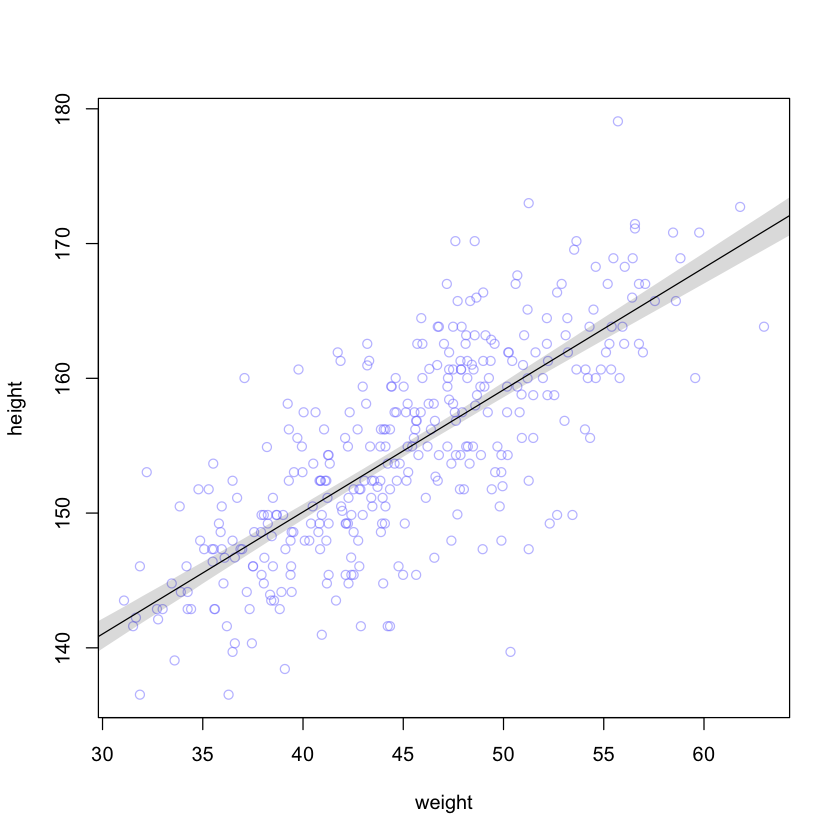

In [ ]:
# plot raw data
# fading out points to make line and interval more visible
plot( height ~ weight , data=d2 , col=col.alpha(rangi2,0.5) )
# plot the MAP line, aka the mean mu for each weight
lines( weight.seq , mu.mean )
# plot a shaded region for 89% PI
shade( mu.PI , weight.seq )

In [ ]:
post <- extract.samples(m4.3)
mu.link <- function(weight) post$a + post$b*( weight - xbar )
weight.seq <- seq( from=25 , to=70 , by=1 )
mu <- sapply( weight.seq , mu.link )
mu.mean <- apply( mu , 2 , mean )
mu.CI <- apply( mu , 2 , PI , prob=0.89 )
mu.HPDI <- apply( mu , 2 , HPDI , prob=0.89 )

In [ ]:
sim.height <- sim( m4.3 , data=list(weight=weight.seq) )
str(sim.height)

 num [1:1000, 1:46] 131 144 136 143 132 ...


In [ ]:
height.PI <- apply( sim.height , 2 , PI , prob=0.89 )

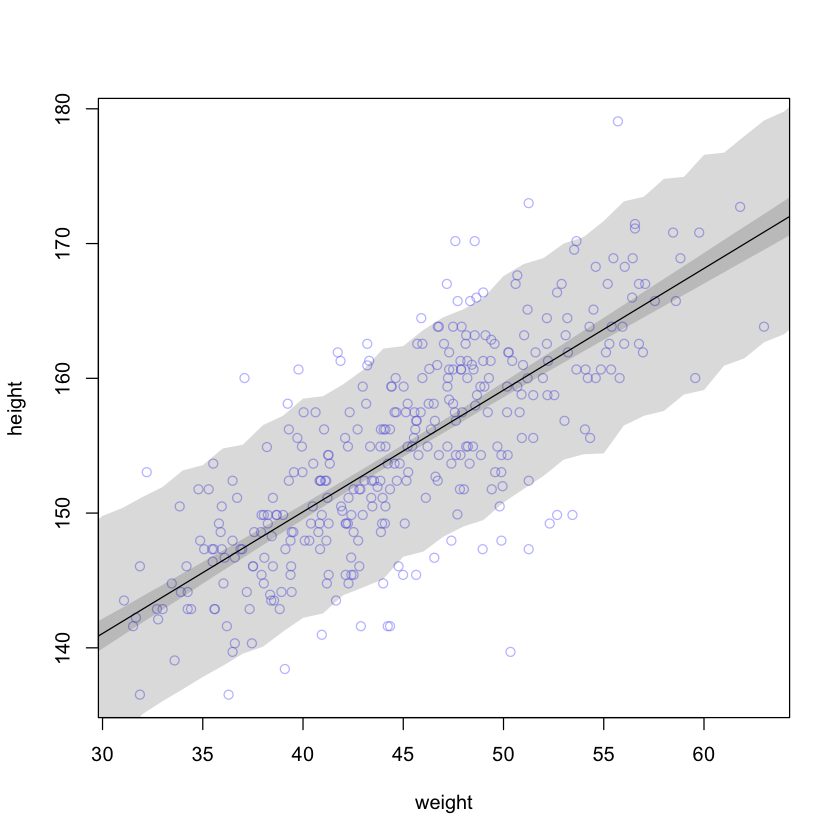

In [ ]:
# plot raw data
plot( height ~ weight , d2 , col=col.alpha(rangi2,0.5) )
# draw MAP line
lines( weight.seq , mu.mean )
# draw HPDI region for line
shade( mu.PI , weight.seq )
# draw PI region for simulated heights
shade( height.PI , weight.seq )

In [ ]:
library(rethinking)
data(Howell1)
d <- Howell1

In [ ]:
d$weight_s <- ( d$weight - mean(d$weight) )/sd(d$weight)
d$weight_s2 <- d$weight_s^2
m4.5 <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a + b1*weight_s + b2*weight_s2 ,
a ~ dnorm( 178 , 20 ) ,
b1 ~ dlnorm( 0 , 1 ) ,
b2 ~ dnorm( 0 , 1 ) ,
sigma ~ dunif( 0 , 50 )
) , data=d )

In [ ]:
precis( m4.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,146.057223,0.3689697,145.467538,146.646908
b1,21.733427,0.2888850,21.271733,22.195121
b2,-7.802656,0.2741834,-8.240854,-7.364458
sigma,5.774366,0.1764574,5.492353,6.056379


In [ ]:
weight.seq <- seq( from=-2.2 , to=2 , length.out=30 )
pred_dat <- list( weight_s=weight.seq , weight_s2=weight.seq^2 )
mu <- link( m4.5 , data=pred_dat )
mu.mean <- apply( mu , 2 , mean )
mu.PI <- apply( mu , 2 , PI , prob=0.89 )
sim.height <- sim( m4.5 , data=pred_dat )
height.PI <- apply( sim.height , 2 , PI , prob=0.89 )

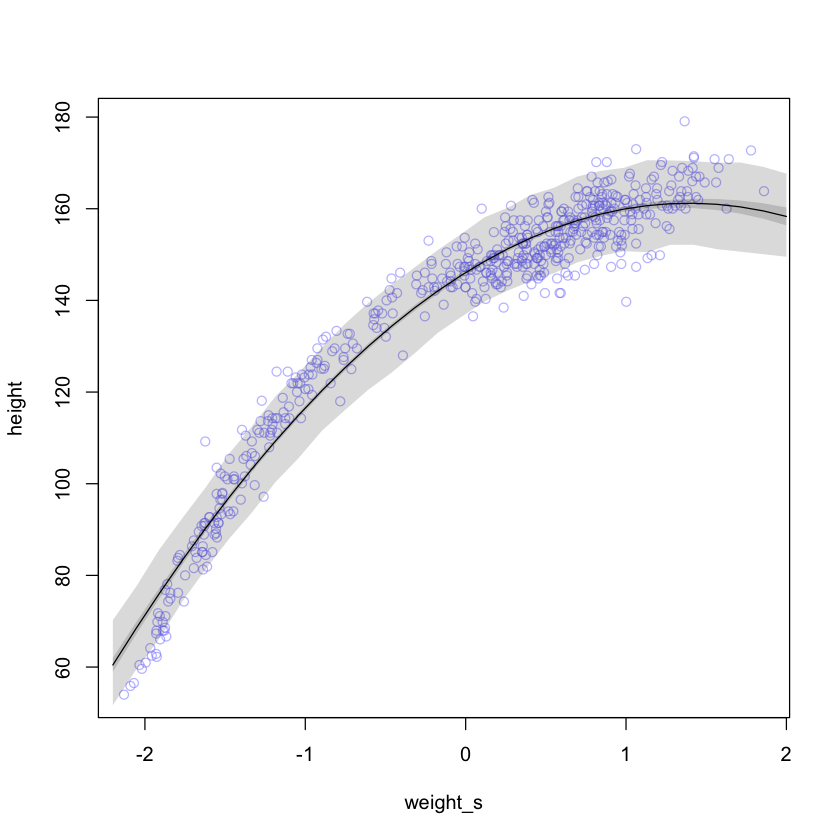

In [ ]:
plot( height ~ weight_s , d , col=col.alpha(rangi2,0.5) )
lines( weight.seq , mu.mean )
shade( mu.PI , weight.seq )
shade( height.PI , weight.seq )

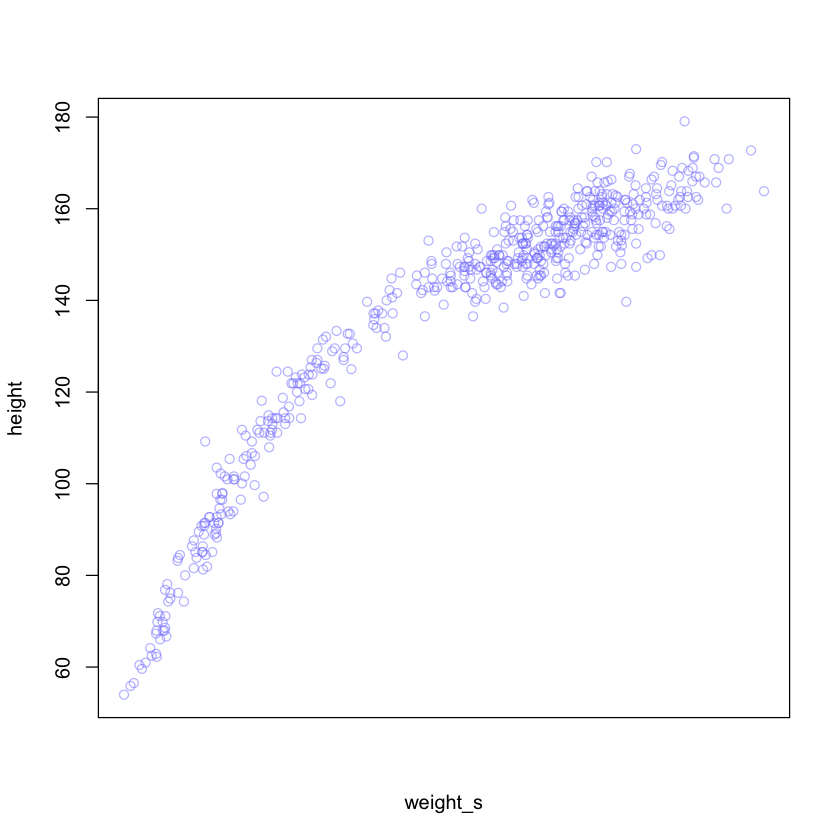

In [ ]:
plot( height ~ weight_s , d , col=col.alpha(rangi2,0.5) , xaxt="n" )

In [ ]:
library(rethinking)
data(cherry_blossoms)
d <- cherry_blossoms
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
year,1408.000000,350.8845964,867.77000,1948.23000,<U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2581>
doy,104.540508,6.4070362,94.43000,115.00000,<U+2581><U+2582><U+2585><U+2587><U+2587><U+2583><U+2581><U+2581>
temp,6.141886,0.6636479,5.15000,7.29470,<U+2581><U+2583><U+2585><U+2587><U+2583><U+2582><U+2581><U+2581>
temp_upper,7.185151,0.9929206,5.89765,8.90235,<U+2581><U+2582><U+2585><U+2587><U+2587><U+2585><U+2582><U+2582><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581>
temp_lower,5.098941,0.8503496,3.78765,6.37000,<U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2583><U+2585><U+2587><U+2583><U+2582><U+2581><U+2581><U+2581>


In [ ]:
d2 <- d[ complete.cases(d$doy) , ] # complete cases on doy
num_knots <- 15
knot_list <- quantile( d2$year , probs=seq(0,1,length.out=num_knots) )

In [ ]:
library(splines)
B <- bs(d2$year, knots=knot_list[-c(1,num_knots)] ,degree=3 , intercept=TRUE )

In [ ]:
mu_prior <- rnorm( 1e4 , 0 , 10 )
sigma_prior <- runif( 1e4 , 0, 10 )

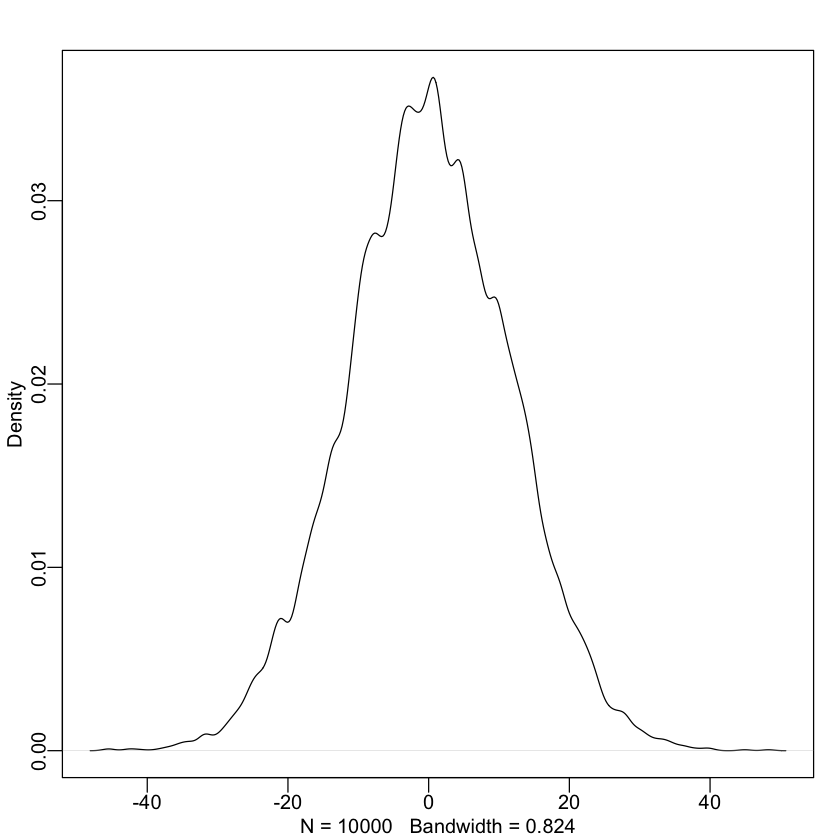

In [ ]:
h_sim <- rnorm( 1e4 , mu_prior , sigma_prior )
dens( h_sim )

In [7]:
library(rethinking)
data(cherry_blossoms)
d <- cherry_blossoms
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
year,1408.000000,350.8845964,867.77000,1948.23000,<U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2581>
doy,104.540508,6.4070362,94.43000,115.00000,<U+2581><U+2582><U+2585><U+2587><U+2587><U+2583><U+2581><U+2581>
temp,6.141886,0.6636479,5.15000,7.29470,<U+2581><U+2583><U+2585><U+2587><U+2583><U+2582><U+2581><U+2581>
temp_upper,7.185151,0.9929206,5.89765,8.90235,<U+2581><U+2582><U+2585><U+2587><U+2587><U+2585><U+2582><U+2582><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581>
temp_lower,5.098941,0.8503496,3.78765,6.37000,<U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2583><U+2585><U+2587><U+2583><U+2582><U+2581><U+2581><U+2581>


In [8]:
d2 <- d[ complete.cases(d$doy, d$temp) , ] # complete cases on doy
num_knots <- 30
knot_list <- quantile( d2$temp , probs=seq(0,1,length.out=num_knots) )

In [9]:
library(splines)
B <- bs(d2$temp,
knots=knot_list[-c(1,num_knots)] ,
degree=3 , intercept=TRUE )

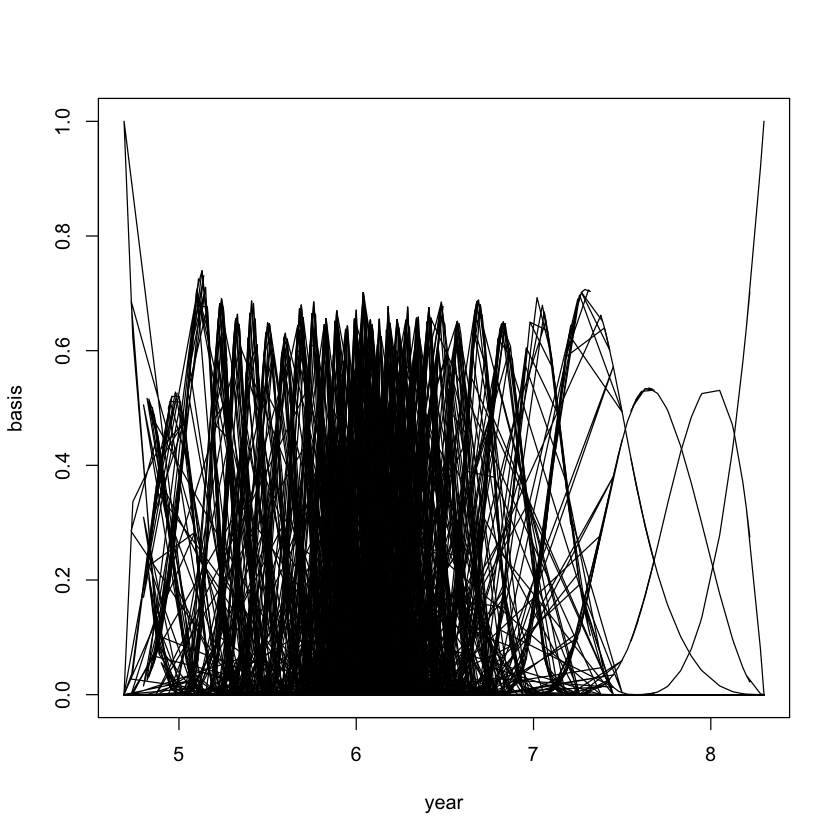

In [10]:
plot( NULL , xlim=range(d2$temp) , ylim=c(0,1) , xlab="year" , ylab="basis" )
for ( i in 1:ncol(B) ) lines( d2$temp , B[,i] )